In [1]:
# Classificação KNN base do código do zamith

In [2]:
from glob import glob
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
import os
os.chdir('/mnt/mint_files/TCC/main_code/')

In [4]:
# Monta as strings e lê os arquivos

# Opção para pegar todas as Bandas
#pathFile = 'images/lagoa_freitas/2015/lagoa_freitas_v1_B[1-6].TIF'
#pathFile = 'images/recreio/2015/LO82170762015220CUB00_B[1-6].TIF'
pathFile = 'images/barra/2015/barra_B[1-6].TIF'
S_sentinel_bands = glob(pathFile)
S_sentinel_bands.sort()

# Opção para pegar apenas as bandas que precisa
# S_sentinel_bands = [
#     'images/lagoa_freitas/2015/lagoa_freitas_v1_B2.TIF',
#     'images/lagoa_freitas/2015/lagoa_freitas_v1_B5.TIF',
#     'images/lagoa_freitas/2015/lagoa_freitas_v1_B6.TIF',
# ]

l = []
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))

# Data
arr_st = np.stack(l)

# Ground Truth
txt = 'Imagem shape D(Bands: {0}, Height: {1}, Width: {2})'.format(arr_st.shape[0], arr_st.shape[1], arr_st.shape[2])
print(txt)

Imagem shape D(Bands: 6, Height: 300, Width: 650)


In [5]:
# Manipula o shape das listas para ser utilizado pelo KMeans
x = np.moveaxis(arr_st, 0, -1)
x.reshape(-1, arr_st.shape[0]).shape, arr_st.shape[1] * arr_st.shape[2]
X_data = x.reshape(-1, arr_st.shape[0])
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)

txt = 'Imagem reshape D(Size: {0}, Bands: {1})'.format(X_scaled.shape[0], X_scaled.shape[1])
print(txt)

pca = PCA(6) # qtd bands
pca.fit(X_scaled)

data = pca.transform(X_scaled)
txt = 'Imagem reshape afther PCA D(Size: {0}, Bands: {1})'.format(data.shape[0], data.shape[1])
print(txt)

Imagem reshape D(Size: 195000, Bands: 6)
Imagem reshape afther PCA D(Size: 195000, Bands: 6)


[0 0 0 ... 0 0 0]


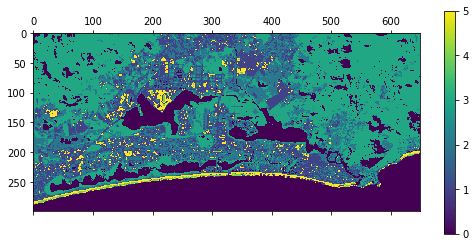

In [7]:
# Roda o classificador

# primeiro parâmetro define o número de classes
kmeans = KMeans(n_clusters = 6,  random_state=0)
kmeans.fit(data)
labels = kmeans.predict(data)
print(labels)
#plt.matshow(labels.reshape(954, 298));
plt.matshow(labels.reshape(arr_st.shape[1], arr_st.shape[2]));
plt.colorbar()
plt.savefig('images/output/knn/zmth/barra/knn_ball_6.png')